# Practical session 3 - Brownian motion, Fourier transform

Students (pair):
- [BLANQUART Ekhi]([link](https://github.com/azagal952)
- [DENISSELLE Alexis]([link](https://github.com/AlexisDns23)

In [26]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

## <a name="ex1">Exercise 1: Brownian motion</a>

This first exercise consists in generating a Brownian motion on the closed unit ball $\mathcal{B}(\mathbf{0}, 1) = \{ \mathbf{x} \mid \Vert \mathbf{x} \Vert  \leq 1\}$, focusing first on the 2-D case. The Brownian motion is a random walk with independent, identically distributed Gaussian increments, appearing for instance in thermodynamics and statistical mechanics (to model the evolution of a large particle in a medium composed of a large number of small particles, ...). It is also connected to the diffusion process (Einstein).

Let $N \in \mathbb{N}^*$, $\delta > 0$, and $\mathbf{x} = (x_1, x_2) \in  \mathcal{B}(\mathbf{0}, 1)$. The first $N$ steps of a 2-D discrete-time Brownian motion $W$ can be generated as follows

\begin{align*}
    W_0 &= \mathbf{x}, \\
    %
    (\forall n \in \{1, \dotsc, N-1 \}), \quad W_n &= W_{n−1} + \sqrt{\delta} G_n, \quad G_n \sim \mathcal{N}(\mathbf{0}, \mathbf{I}),
\end{align*}

where $\mathcal{N}(\mathbf{0}, \mathbf{I})$ is a Gaussian distribution with mean $\mathbf{0}$ and identity covariance matrix.

1. Define a random generator `rng`, set to a known state for reproducibility (see session 2).

**Answer:**

In [28]:
rng = np.random.default_rng(106620185328035836413676238315917800117)

2. Implement a function `brownian_motion(niter, x, step, rng)` which

    - simulates $W$ until it reaches the boundary of $\mathcal{B}(\mathbf{0}, 1)$, using a maximum of $N$ iterations (`niter`), a starting point $\mathbf{x} \in \mathcal{B}(\mathbf{0}, 1)$ (`x`) and step-size $\delta$ (`step`);
    - interpolates linearly between the two last positions to determine the points $W^*$ where the trajectory crosses the boundary (if applicable);
    - returns both the whole random walk $W$ and, if appropriate, the point at the intersection between the last segment of the trajectory and $\mathcal{B}(\mathbf{0}, 1)$.
 
> Hint: 
> - you can easily derive a closed form expression for $W^*$, observing that $\Vert W^* \Vert^2= 1$ and $W^* \in [W_{n-1}, W_n]$. 
> - you can also take a look at [`np.roots`](https://numpy.org/doc/stable/reference/generated/numpy.roots.html?highlight=roots#numpy.roots) if needed.

**Answer:**

In [29]:
def brownian_motion(niter, x, step, rng):
    """
    Computes the Brownian motion, starting from {x}, with maximum {step} steps.

    Args:
        niter: maximum number of iterations
        x: starting position
        step: maximum number of steps
        rng: random number generator

    Returns:
        w: the random walk
        x_bord: the crossing point, if applicable, 0 otherwise
    """
    norm = np.linalg.norm(x)
    if norm > 1: raise ValueError("The starting position should be in B(0,1).")
    
    w = [x]
    sqrt_step = np.sqrt(step)
    n = 0
    x_bord = np.array([])
    
    while n < niter and norm <= 1:
        g = rng.multivariate_normal(np.zeros(2), np.eye(2))
        x = x + sqrt_step * g
        norm = np.linalg.norm(x)
        w.append(x)
        n += 1
    if norm > 1:
        ## We use np.roots to find the crossing point
        a = np.linalg.norm(w[-2] - w[-1])**2
        b = 2 * w[-2].dot(w[-1] - w[-2])
        c = np.linalg.norm(w[-2])**2 - 1
        t = np.roots([a, b, c])[1]
        x_bord = t * w[-1] + (1 - t) * w[-2]

    return np.array(w), x_bord

3. Display the trajectory of a Brownian motion starting from $\mathbf{x} = (0.2, 0.4)$, using $\delta = 10^{-2}$, $N = 1000$. Display the unit circle on the same figure, and highlight the intersection with the boundary of the domain (whenever it exists).

> Hint: to draw the unit disk, you can use for instance:
> ```python
> circle = plt.Circle((0,0), 1)
> fig, ax = plt.subplots()
> plt.xlim(-1.25,1.25)
> plt.ylim(-1.25,1.25)
> plt.grid(linestyle = "--", zorder = 1)
> ax.set_aspect(1)
> ax.add_artist(circle)
> ```

**Answer:**

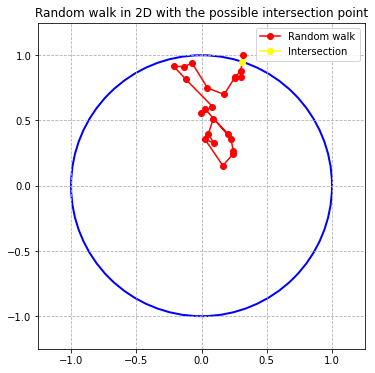

In [30]:
# Computing the brownian motion
walk, intersection = brownian_motion(1000, np.array([.2, .4]), 1e-2, rng)

# Plotting the trajectory
fig, ax = plt.subplots(figsize=(12, 6))

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

ax.plot(walk[:,0], walk[:,1], marker='o', color='red', label="Random walk")

if intersection.size > 0:
    plt.plot(intersection[0], intersection[1], marker='o', color='yellow', label="Intersection")

circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_artist(circle)

ax.grid(linestyle="--", zorder=1)
ax.set_aspect(1)

plt.legend()
plt.title("Random walk in 2D with the possible intersection point")
plt.show()

4. Represent, on the same figure, 4 other trajectories of $W$ with the same parameters.

**Answer:**

[0.26268136 0.96488264]
[ 0.63446411 -0.77295232]
[-0.93601895 -0.3519496 ]
[-0.06002138  0.99819709]
[0.26143808 0.96522025]


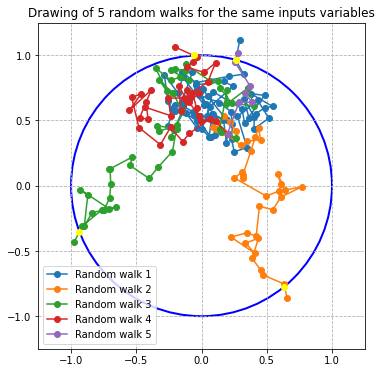

In [31]:
# your code
fig, ax = plt.subplots(figsize=(12, 6))

plt.xlim(-1.25,1.25)
plt.ylim(-1.25,1.25)

for i in range(5):
    walk, intersection = brownian_motion(1000, np.array([.2, .4]), 1e-2, rng)
    walk = np.array(walk)
    print(intersection)

    ax.plot(walk[:,0], walk[:,1], marker='o', label=f"Random walk {i+1}")

    if intersection.size > 0:
        plt.plot(intersection[0], intersection[1], marker='o', color='yellow')

circle = plt.Circle((0, 0), 1, fill=False, color='blue', linewidth=2)
ax.add_artist(circle)

ax.grid(linestyle="--", zorder=1)
ax.set_aspect(1)

plt.legend(loc='best')
plt.title("Drawing of 5 random walks for the same inputs variables")
plt.show()

5. [Bonus] Generalize the procedure to a $M$-dimensional Brownian motion, $M > 2$.

**Answer:**

In [32]:
def brownian_motion(niter, x, step, rng):
    """
    Computes a Brownian motion confined in B(0,1) in a maximum number of steps. If the trajectory goes out of the closed unit ball, computes where the two last points cross the border.
    The starting point must be in B(0,1) for the function to work, otherwise it raises a ValueError.

    Args:
        niter (int): maximum number of iterations
        x: starting position, shape (M,1)
        step (float): maximum number of steps
        rng: random number generator

    Returns:
        w: the random walk
        x_bord: the crossing point, if applicable, an empty array otherwise
    """
    norm = np.linalg.norm(x)
    if norm > 1: raise ValueError("The starting position should be in B(0,1).")
    
    dim = x.shape[0]
    w = [x]
    sqrt_step = np.sqrt(step)
    n = 0
    x_bord = np.array([])
    
    while n < niter and norm <= 1:
        g = rng.multivariate_normal(np.zeros(dim), np.eye(dim))
        x = x + sqrt_step * g
        norm = np.linalg.norm(x)
        w.append(x)
        n += 1
    if norm > 1:
        ## We use np.roots to find the crossing point
        a = np.linalg.norm(w[-2] - w[-1])**2
        b = 2 * w[-2].dot(w[-1] - w[-2])
        c = np.linalg.norm(w[-2])**2 - 1
        t = np.roots([a, b, c])[1]
        x_bord = t * w[-1] + (1 - t) * w[-2]

    return np.array(w), x_bord

In [33]:
x0 = np.array([0, 0, 0])
brownian_motion(1000, x0, 1e-2, rng)

(array([[ 0.        ,  0.        ,  0.        ],
        [ 0.08040809,  0.04274763, -0.04509369],
        [ 0.04968119,  0.03068872,  0.03760998],
        [ 0.20248612,  0.2783182 ,  0.11840597],
        [ 0.14793114,  0.13511992,  0.02444892],
        [ 0.21394907,  0.21977047, -0.17260872],
        [ 0.36424677,  0.28012328, -0.04712325],
        [ 0.34997693,  0.34952674, -0.05988593],
        [ 0.34231953,  0.26599259, -0.10866054],
        [ 0.40243211,  0.38078751, -0.09313957],
        [ 0.37050412,  0.28879227,  0.00162077],
        [ 0.25004328,  0.20721307,  0.0396855 ],
        [ 0.26680836,  0.08589577,  0.17522822],
        [ 0.3790253 , -0.17166913,  0.11871669],
        [ 0.35095071, -0.26586012,  0.00900239],
        [ 0.0963668 , -0.25019207, -0.01532984],
        [ 0.17739349, -0.28166916, -0.03112859],
        [ 0.27292779, -0.39633099, -0.00235058],
        [ 0.30866289, -0.36201511,  0.13270871],
        [ 0.25686847, -0.45689072,  0.05187805],
        [ 0.312036  

---
## <a name="ex2">Exercise 2: 2D Fourier transform, ideal low-pass filter and linear convolution</a>

In this exercise, we explore the use of the 2-dimensional Fourier transform to filter an image, and convolve it with a blurring kernel.

1\. Load and display one of the images contained in the `img/` folder. The image will be denoted by $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ in the rest of this exercise.

**Answer:**

(512, 512)


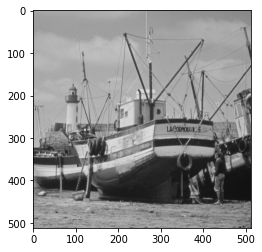

In [51]:
# your code
X = Image.open('img/boat.png')
print(X.size)
plt.imshow(X)

2\. Let $\mathcal{F}$ denote the 2D discrete Fourier transform. Compute $|\mathcal{F}(\mathbf{X})|^2$, the spectrum of the image $\mathbf{X} \in \mathbb{R}^{M_1 \times N_1}$ (i.e., the term-wise squared absolute value of its Fourier transform) loaded in 1. Display the result in logarithmic scale.

a) In this representation, where is the pixel of the spectrum associated with the null frequency located?
    
b) Take a look at the documentation of `np.fft.fftshift`. Use it to ensure that the null frequency is located at the center of the image. 

**Answer:**

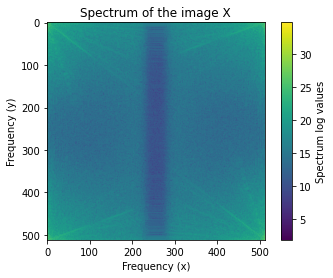

In [56]:
# your code
F = np.fft.fft2(X)
spectrum = np.power(np.abs(F),2)
spectrum_log = np.log1p(spectrum) # +1 to prevent from 0values

plt.imshow(spectrum_log)
plt.colorbar(label='Spectrum log values')
plt.title('Spectrum of the image X')
plt.xlabel('Frequency (x)')
plt.ylabel('Frequency (y)')
plt.show()

_(a)_ In this representation, the pixel of the spectrum associated with the null frequency, i.e. $(f_x,f_y) = (0,0)$, is located in the top-left corner of the image.

_(b)_ After taking a look at the [documentation](https://numpy.org/devdocs/reference/generated/numpy.fft.fftshift.html) of `np.fft.fftshift`, we produce this new code.

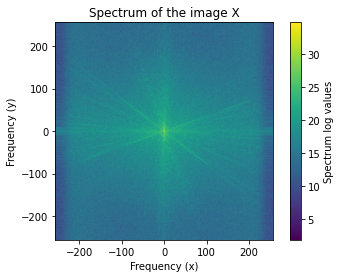

In [64]:
FS = np.fft.fftshift(F)
spectrum = np.power(np.abs(FS),2) # Energy of the FFT
spectrum_log = np.log1p(spectrum) # +1 to prevent from 0 values

# Let's compute the extents
Nx,Ny = X.size
fx_max = Nx/2
fy_max = Ny/2

plt.imshow(spectrum_log, extent=[-fx_max,fx_max,-fy_max,fy_max])
plt.colorbar(label='Spectrum log values')
plt.title('Spectrum of the image X')
plt.xlabel('Frequency (x)')
plt.ylabel('Frequency (y)')
plt.show()

3\. 
    a) Create a function `ideal_lowpass_filter` to filter $\mathbf{X}$ by an ideal low-pass filter. The filter preserves Fourier coefficients associated to frequencies below a cutoff specified in each direction ($\mathbf{f}_c = (f_{c,y}, f_{c,x})$), and sets others to zero. For simplicity, $f_{c,y}$ and $f_{c,x}$ can be expressed as a number of samples to be kept along each dimension (e.g., $\mathbf{f}_c = (50,50)$).

b) Display the filtered image for 2 different values of $\mathbf{f}_c$. What do you observe as the cutoff frequencies increase?
    
> Warning: beware the type of the array after `np.fft.fft2`, do not hesitate to specify the type if you make copies from this array
> ```python
> a = np.zeros((2,2), dtype=np.complex)
> ...
> ```

**Answer:**

In [36]:
# your code

4\. Let $\mathbf{H} \in \mathbb{R}^{M_2\times N_2}$ be a 2-D Gaussian kernel, obtained as the outer product of two 1-D Gaussian windows $\mathbf{w}_y \in \mathbb{R}^{M_2}$ and $\mathbf{w}_x \in \mathbb{R}^{N_2}$, of standard deviation $\sigma_y = 10$ and $\sigma_x = 10$, respectively:

\begin{equation}
    \mathbf{H} = \mathbf{w}_y \mathbf{w}_x^T.
\end{equation}

Let $M = M_1+M_2-1$ and $N =  N_1+N_2-1$. From the discrete convolution theorem, the linear convolution between $\mathbf{H}$ and $\mathbf{X}$ can be computed as follows

\begin{equation}
    \mathbf{X} \star \mathbf{H} = \mathcal{F}^{-1} \Big( \mathcal{F}\big(P_1(\mathbf{X})\big) \odot \mathcal{F}\big(P_2(\mathbf{H})\big) \Big) \in \mathbb{R}^{M\times N},
\end{equation}

where $P_i: \mathbb{R}^{M_i \times N_i} \rightarrow \mathbb{R}^{M \times N}$, $i \in \{1, 2\}$, are 0-padding operators, $\odot$ is the Hadamard (= term-wise) product, $\mathcal{F}^{-1}$ is the 2D discrete inverse Fourier transform.

Compute and display $\mathbf{X} \star \mathbf{H}$, for $M_2 = N_2 = 10$. What do you observe?

> Hint: 
> - the usual 0-padding procedure in image space consists in appending trailing zeros. For instance (in 1D), 0-padding a vector $\mathbf{x} \in \mathbb{R}^N_1$ to the size $N>N_1$ corresponds to creating the vector
\begin{bmatrix}
\mathbf{x} \\
\mathbf{0}_{N-N_1}
\end{bmatrix}
> - since the input images are real, $\mathcal{F}(\mathbf{x})$ and $\mathcal{F}(\mathbf{h})$ are Hermitian symmetric. In this case, a more efficient version of `np.fft.fft2` can be used, computing only quarter of the Fourier coefficients (half of the Fourier coefficients in each direction): [`np.fft.rfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.rfft2.html?highlight=rfft#numpy.fft.rfft2). Its inverse, [`np.fft.irfft2`](https://numpy.org/doc/stable/reference/generated/numpy.fft.irfft2.html#numpy.fft.irfft2), also ensures that the output is real;
> - the 2D Gaussian window can be generated as the outer product of two 1D Gaussian windows (one window for each dimension);
> - you can take a look at [scipy.signal.windows.gaussian](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.windows.gaussian.html#scipy.signal.windows.gaussian) and [np.newaxis](https://numpy.org/doc/stable/reference/constants.html?highlight=newaxis#numpy.newaxis).

**Answer:**

In [37]:
# your code